# NAME: Gollapalli Likhitha

# The Sparks Foundation Task2

# K-Means Clustering( Unsupervised ML Algorithm)

In [1]:
#importing libraries
import numpy as  np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns


from sklearn.cluster import KMeans

In [2]:
#loading the dataset
iris=datasets.load_iris()

In [3]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [4]:
df.shape

(150, 4)

In [5]:
print(df.head(3))
print(df.tail(3))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

# Visualisation

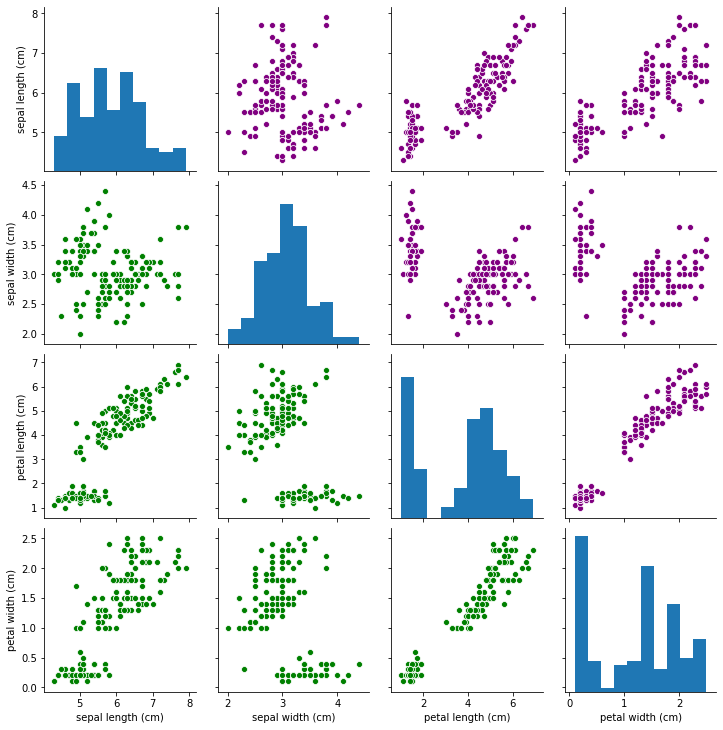

In [9]:
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot,color='purple')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist)

In [10]:
x=df.iloc[:,[0,1,2,3]].values

In [11]:
x[0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [12]:
#labels of the dataset
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
s = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    s.append(km.inertia_)
    

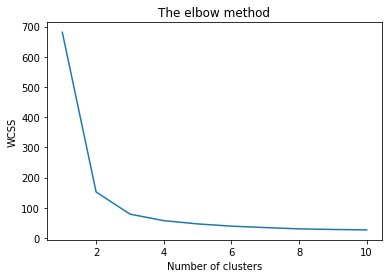

In [14]:
# `Using 'The elbow' curve method to determine the no.of clusters that can be formed
plt.plot(range(1, 11), s)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

# Model Creation

In [15]:
#From the above curve we can see that there is no much significant change from value 3; so we create 3 clusters 
#  Creating the kmeans classifier
k = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y = k.fit_predict(x)

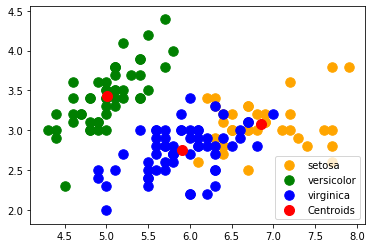

In [16]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 90, c = 'orange', label = 'setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 90, c = 'green', label = 'versicolor')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 90, c = 'blue', label = 'virginica')
plt.scatter(k.cluster_centers_[:, 0], k.cluster_centers_[:,1],s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.show()